In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("talk")

print("EDA environment ready ✅")

ModuleNotFoundError: No module named 'seaborn'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("talk")

print("EDA environment ready ✅")

EDA environment ready ✅


In [2]:
sst = pd.read_csv("data/processed/sst_features.csv")
sst.head()

,mean_sst,std_sst,min_sst,max_sst,source
0,29.617511,0.505201,27.013,30.886,bay_of_bengal_sst_20231019.nc
1,29.509042,0.834659,22.613,30.701,bay_of_bengal_sst_20231021.nc


In [3]:
sst.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mean_sst  2 non-null      float64
 1   std_sst   2 non-null      float64
 2   min_sst   2 non-null      float64
 3   max_sst   2 non-null      float64
 4   source    2 non-null      object 
dtypes: float64(4), object(1)
memory usage: 212.0+ bytes


In [4]:
sst.describe()


,mean_sst,std_sst,min_sst,max_sst
count,2.000000,2.000000,2.00000,2.000000
mean,29.563277,0.669930,24.81300,30.793500
std,0.076699,0.232962,3.11127,0.130815
min,29.509042,0.505201,22.61300,30.701000
25%,29.536159,0.587566,23.71300,30.747250
50%,29.563277,0.669930,24.81300,30.793500
75%,29.590394,0.752295,25.91300,30.839750
max,29.617511,0.834659,27.01300,30.886000


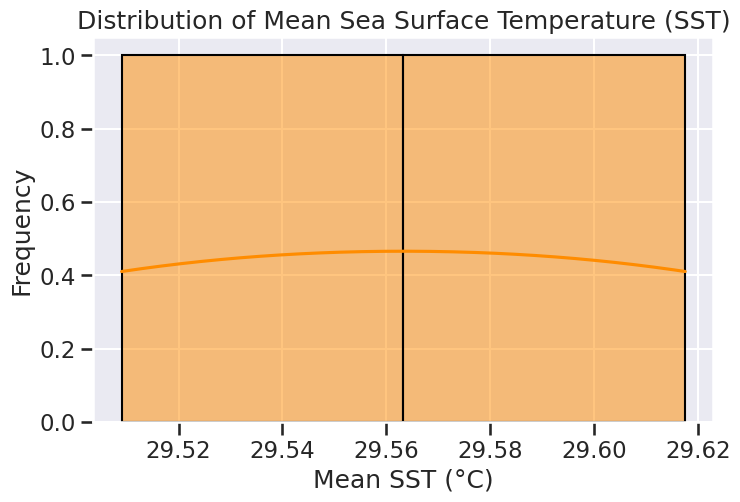

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(sst["mean_sst"], kde=True, color="#ff8c00")
plt.title("Distribution of Mean Sea Surface Temperature (SST)")
plt.xlabel("Mean SST (°C)")
plt.ylabel("Frequency")
plt.show()

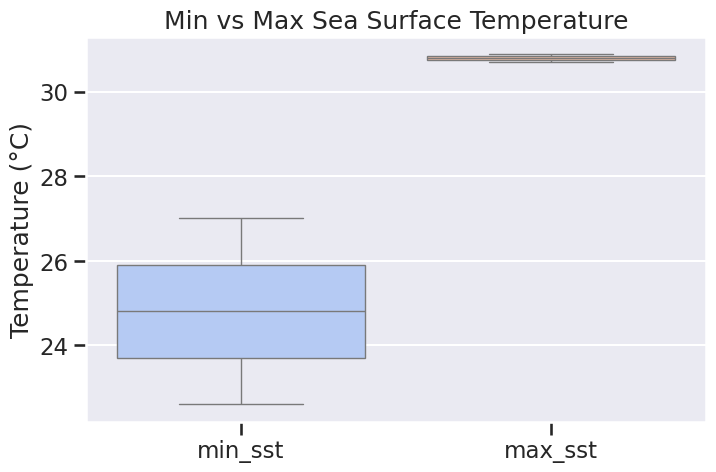

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=sst[["min_sst", "max_sst"]], palette="coolwarm")
plt.title("Min vs Max Sea Surface Temperature")
plt.ylabel("Temperature (°C)")
plt.show()

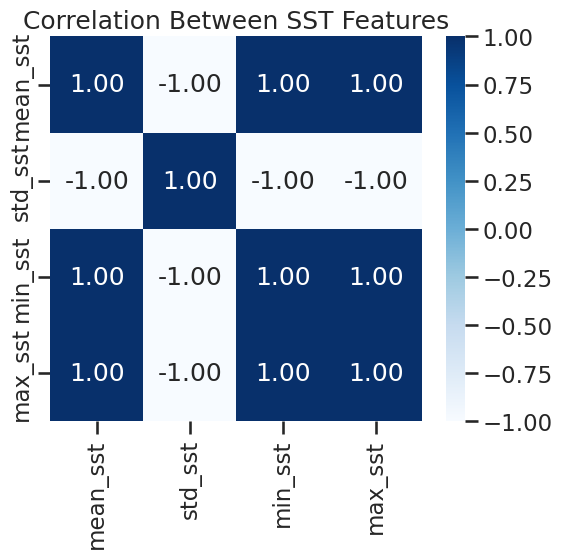

In [7]:
plt.figure(figsize=(6,5))
sns.heatmap(
    sst[["mean_sst","std_sst","min_sst","max_sst"]].corr(),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title("Correlation Between SST Features")
plt.show()

In [8]:
sst["sst_range"] = sst["max_sst"] - sst["min_sst"]
sst[["sst_range"]].head()


,sst_range
0,3.873
1,8.088


In [9]:
oxygen.info()

NameError: name 'oxygen' is not defined

In [10]:
oxygen = pd.read_csv("data/processed/oxygen_features.csv")
oxygen.head()

,o2,nppv
0,200.12747,8.888845
1,200.17432,8.989649
2,200.37679,10.277115
3,200.15872,11.310352
4,199.81848,11.489835


In [11]:
oxygen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123240 entries, 0 to 123239
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   o2      123240 non-null  float64
 1   nppv    123240 non-null  float64
dtypes: float64(2)
memory usage: 1.9 MB


In [12]:
oxygen.describe()

,o2,nppv
count,123240.000000,123240.000000
mean,205.228269,14.738547
std,9.813037,39.618072
min,195.888260,1.384328
25%,201.655670,5.182389
50%,203.039005,7.422061
75%,205.804690,13.113499
max,419.050840,1024.010500


In [13]:
plt.figure(figsize=(8,5))
sns.histplot(oxygen["mean_oxygen"], kde=True, color="#00bcd4")
plt.title("Distribution of Mean Dissolved Oxygen")
plt.xlabel("Mean Oxygen (mg/L)")
plt.ylabel("Frequency")
plt.show()

KeyError: 'mean_oxygen'

<Figure size 800x500 with 0 Axes>

In [14]:
oxygen.columns


Index(['o2', 'nppv'], dtype='object')

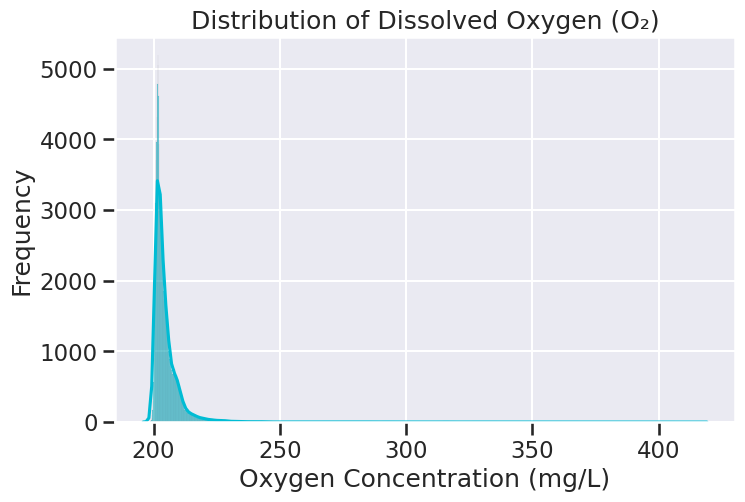

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(oxygen["o2"], kde=True, color="#00bcd4")
plt.title("Distribution of Dissolved Oxygen (O₂)")
plt.xlabel("Oxygen Concentration (mg/L)")
plt.ylabel("Frequency")
plt.show()

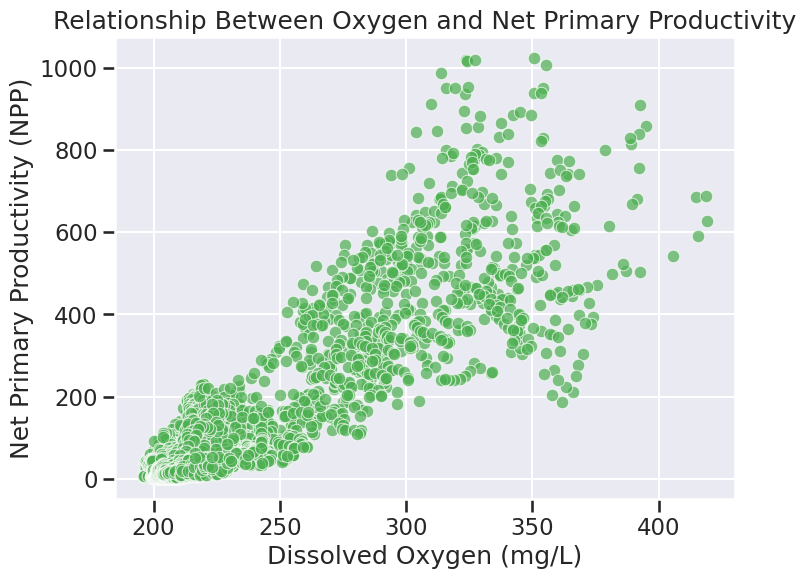

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=oxygen["o2"],
    y=oxygen["nppv"],
    alpha=0.7,
    color="#4caf50"
)
plt.title("Relationship Between Oxygen and Net Primary Productivity")
plt.xlabel("Dissolved Oxygen (mg/L)")
plt.ylabel("Net Primary Productivity (NPP)")
plt.show()

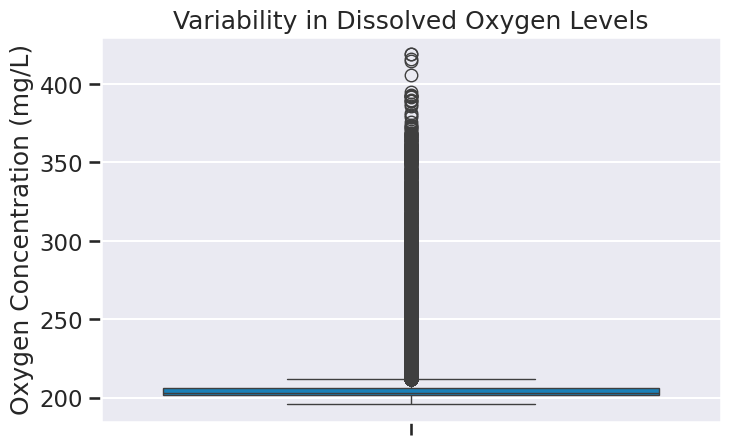

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(y=oxygen["o2"], color="#0288d1")
plt.title("Variability in Dissolved Oxygen Levels")
plt.ylabel("Oxygen Concentration (mg/L)")
plt.show()

In [18]:
def oxygen_risk(o2):
    if o2 < 3:
        return "Critical"
    elif o2 < 5:
        return "Moderate"
    else:
        return "Healthy"

oxygen["oxygen_risk"] = oxygen["o2"].apply(oxygen_risk)
oxygen[["o2", "oxygen_risk"]].head()


,o2,oxygen_risk
0,200.12747,Healthy
1,200.17432,Healthy
2,200.37679,Healthy
3,200.15872,Healthy
4,199.81848,Healthy


/tmp/ipykernel_12750/583127675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=oxygen["oxygen_risk"], palette="coolwarm")


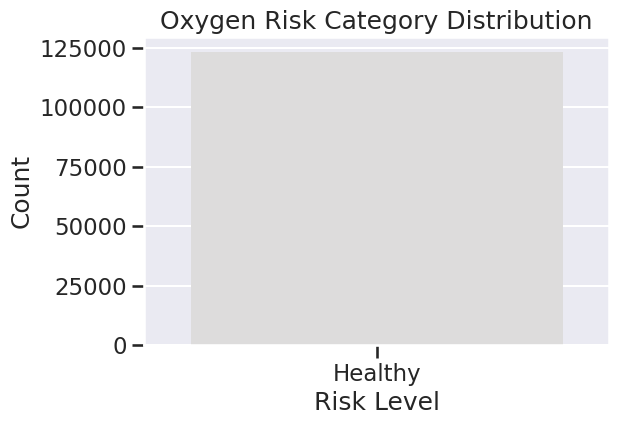

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=oxygen["oxygen_risk"], palette="coolwarm")
plt.title("Oxygen Risk Category Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

In [20]:
import pandas as pd

ph = pd.read_csv("data/processed/ph_features.csv")
ph.head()

,ph_value
0,8.013723
1,8.010039
2,8.007988
3,8.009450
4,8.012184


In [21]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123240 entries, 0 to 123239
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ph_value  123240 non-null  float64
dtypes: float64(1)
memory usage: 962.9 KB


In [22]:
ph.columns

Index(['ph_value'], dtype='object')

In [23]:
ph.describe()

,ph_value
count,123240.000000
mean,8.045752
std,0.047116
min,7.389316
25%,8.030284
50%,8.037661
75%,8.049953
max,8.715102


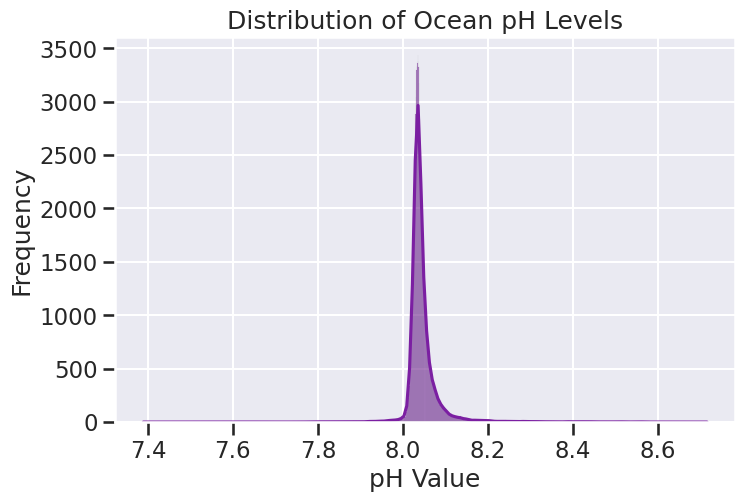

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(ph["ph_value"], kde=True, color="#7b1fa2")
plt.title("Distribution of Ocean pH Levels")
plt.xlabel("pH Value")
plt.ylabel("Frequency")
plt.show()

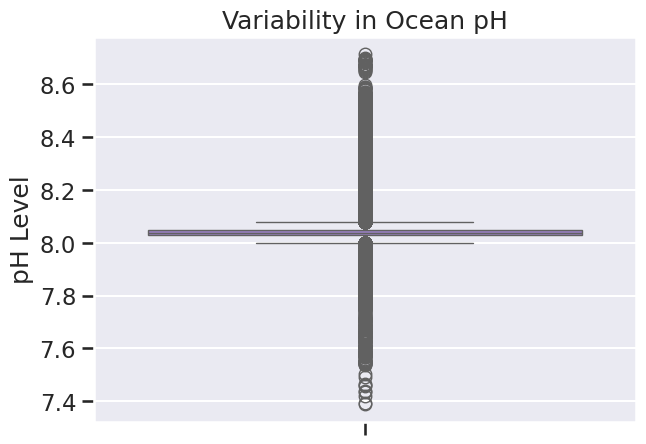

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(y=ph["ph_value"], color="#9575cd")
plt.title("Variability in Ocean pH")
plt.ylabel("pH Level")
plt.show()

In [26]:
def acidification_risk(ph):
    if ph < 7.8:
        return "High"
    elif ph < 8.0:
        return "Moderate"
    else:
        return "Low"

ph["acidification_risk"] = ph["ph_value"].apply(acidification_risk)
ph.head()

,ph_value,acidification_risk
0,8.013723,Low
1,8.010039,Low
2,8.007988,Low
3,8.009450,Low
4,8.012184,Low


/tmp/ipykernel_12750/4274543243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ph["acidification_risk"], palette="rocket")


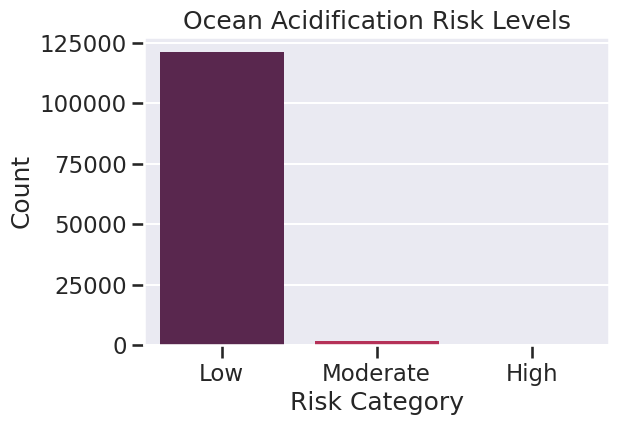

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x=ph["acidification_risk"], palette="rocket")
plt.title("Ocean Acidification Risk Levels")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

In [29]:
ph.to_csv("data/processed/ph_features_with_risk.csv", index=False)

In [30]:
import pandas as pd

chl = pd.read_csv("data/processed/modis_chlorophyll_features.csv")
chl.head()

,mean_r,mean_g,mean_b,std_r,std_g,std_b,image,label
0,2.015945,12.012177,18.537491,17.513316,47.289760,61.913226,AQUA_MODIS.20231101.L3m.DAY.CHL.chlor_a.4km.nc...,normal
1,2.057480,10.830978,16.859116,17.074026,45.253696,58.688637,AQUA_MODIS.20231102.L3m.DAY.CHL.chlor_a.4km.nc...,normal
2,2.158951,11.599503,16.776245,18.099520,46.829882,58.686092,AQUA_MODIS.20231103.L3m.DAY.CHL.chlor_a.4km.nc...,normal
3,2.119522,11.854401,17.447693,17.494282,47.214225,59.777407,AQUA_MODIS.20231104.L3m.DAY.CHL.chlor_a.4km.nc...,normal
4,2.161560,11.547775,16.289993,17.952831,46.871700,57.735011,AQUA_MODIS.20231105.L3m.DAY.CHL.chlor_a.4km.nc...,normal


In [31]:
chl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean_r  30 non-null     float64
 1   mean_g  30 non-null     float64
 2   mean_b  30 non-null     float64
 3   std_r   30 non-null     float64
 4   std_g   30 non-null     float64
 5   std_b   30 non-null     float64
 6   image   30 non-null     object 
 7   label   30 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.0+ KB


In [32]:
chl.describe()

,mean_r,mean_g,mean_b,std_r,std_g,std_b
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.800333,10.987389,16.292641,16.260147,45.425985,58.076842
std,0.201311,0.720076,1.105384,1.106666,1.519969,1.879248
min,1.368729,9.106339,13.806259,14.049444,41.641098,53.876893
25%,1.636974,10.496319,15.756752,15.531236,44.300164,57.148883
50%,1.800972,11.074265,16.303261,16.198647,45.573714,58.143888
75%,1.921753,11.530319,17.094395,17.058299,46.826304,59.286049
max,2.161560,12.012177,18.537491,18.340875,47.289760,61.913226


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(chl["chlorophyll"], kde=True, color="#2e7d32")
plt.title("Distribution of Chlorophyll Concentration")
plt.xlabel("Chlorophyll (mg/m³)")
plt.ylabel("Frequency")
plt.show()

KeyError: 'chlorophyll'

<Figure size 800x500 with 0 Axes>

In [34]:
chl.columns

Index(['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'image',
       'label'],
      dtype='object')

/tmp/ipykernel_12750/1221410155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=chl["label"], palette="Set2")


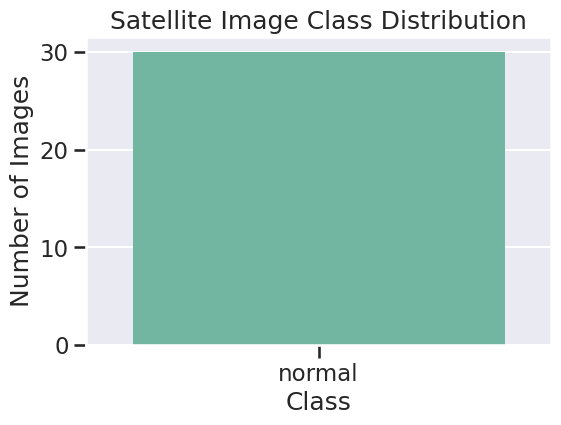

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x=chl["label"], palette="Set2")
plt.title("Satellite Image Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

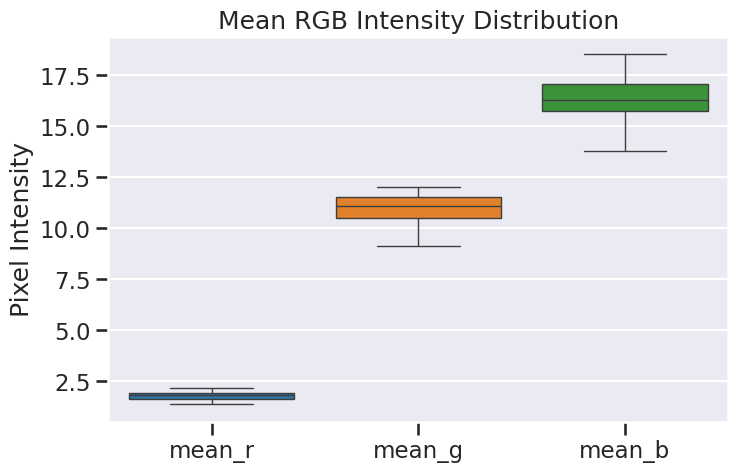

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data=chl[["mean_r", "mean_g", "mean_b"]])
plt.title("Mean RGB Intensity Distribution")
plt.ylabel("Pixel Intensity")
plt.show()

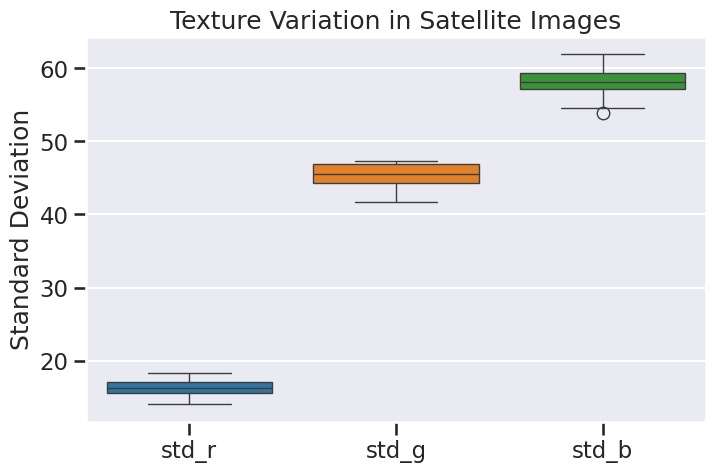

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(data=chl[["std_r", "std_g", "std_b"]])
plt.title("Texture Variation in Satellite Images")
plt.ylabel("Standard Deviation")
plt.show()

/tmp/ipykernel_12750/3135537540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="mean_g", data=chl, palette="Set3")


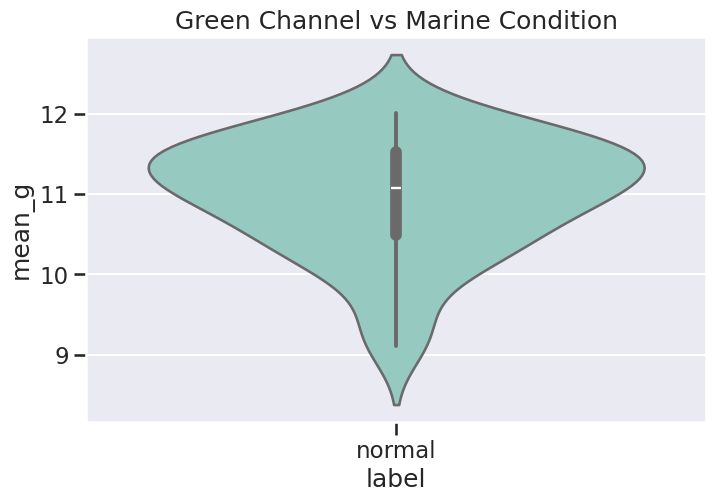

In [38]:
plt.figure(figsize=(8,5))
sns.violinplot(x="label", y="mean_g", data=chl, palette="Set3")
plt.title("Green Channel vs Marine Condition")
plt.show()

In [39]:
chl["green_ratio"] = chl["mean_g"] / (chl["mean_r"] + chl["mean_b"])
chl.head()

,mean_r,mean_g,mean_b,std_r,std_g,std_b,image,label,green_ratio
0,2.015945,12.012177,18.537491,17.513316,47.289760,61.913226,AQUA_MODIS.20231101.L3m.DAY.CHL.chlor_a.4km.nc...,normal,0.584436
1,2.057480,10.830978,16.859116,17.074026,45.253696,58.688637,AQUA_MODIS.20231102.L3m.DAY.CHL.chlor_a.4km.nc...,normal,0.572565
2,2.158951,11.599503,16.776245,18.099520,46.829882,58.686092,AQUA_MODIS.20231103.L3m.DAY.CHL.chlor_a.4km.nc...,normal,0.612590
3,2.119522,11.854401,17.447693,17.494282,47.214225,59.777407,AQUA_MODIS.20231104.L3m.DAY.CHL.chlor_a.4km.nc...,normal,0.605830
4,2.161560,11.547775,16.289993,17.952831,46.871700,57.735011,AQUA_MODIS.20231105.L3m.DAY.CHL.chlor_a.4km.nc...,normal,0.625843
